In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
X, y = housing.data, housing.target

In [5]:
print(X.shape, y.shape)

(20640, 8) (20640,)


In [6]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=42)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


In [9]:
stand_scale = StandardScaler()

x_train_trans = stand_scale.fit_transform(X_train)
x_valid_trans = stand_scale.transform(X_valid)
x_test_trans = stand_scale.transform(X_test)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

In [11]:
model.compile(optimizer='sgd', loss="mse")

In [12]:
history = model.fit(x_train_trans, y_train, validation_data=(x_valid_trans, y_valid), epochs=10)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.7662 - val_loss: 12.0078
Epoch 2/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.6149 - val_loss: 16.8592
Epoch 3/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5291 - val_loss: 2.3707
Epoch 4/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4197 - val_loss: 0.5128
Epoch 5/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3923 - val_loss: 0.3657
Epoch 6/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3846 - val_loss: 0.3639
Epoch 7/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3756 - val_loss: 0.3649
Epoch 8/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3710 - val_loss: 0.5575
Epoch 9/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3694 - val

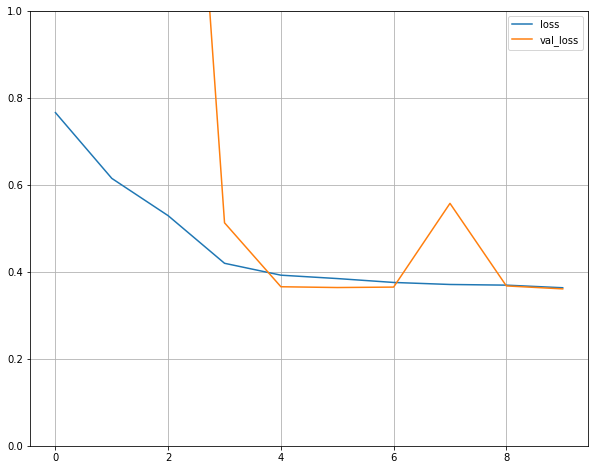

In [13]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [14]:
model.evaluate(x_test_trans, y_test)

5160/5160 [==============================] - 0s 31us/sample - loss: 0.3617


0.36172103140243267